In [1112]:
import pandas as pd
import numpy as np

In [1113]:
data = pd.read_csv('./bank.csv', na_values=['-', ' ', ''])

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             4897 non-null   object 
 1   CreditScore         4898 non-null   int64  
 2   Geography           4896 non-null   object 
 3   Gender              4898 non-null   object 
 4   Age                 4895 non-null   float64
 5   Tenure              4898 non-null   int64  
 6   Balance             4898 non-null   float64
 7   NumOfProducts       4898 non-null   int64  
 8   HasCrCard           4898 non-null   int64  
 9   IsActiveMember      4898 non-null   int64  
 10  EstimatedSalary     4898 non-null   float64
 11  Exited              4898 non-null   int64  
 12  Satisfaction.Score  4898 non-null   int64  
 13  Card.Type           4898 non-null   object 
 14  Point.Earned        4898 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 574.1+

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction.Score,Card.Type,Point.Earned
0,Hargrave,619,France,Female,NaN,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,3,DIAMOND,456
2,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,NaN,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [ ]:
# !

# data['Stayed'] = data['Exited'].map({
#   1: 0,
#   0: 1
# })
data['Stayed'] = np.where(data['Exited'] == 1, 0, 1)
data.drop(columns='Exited', inplace=True)

In [1115]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction.Score,Card.Type,Point.Earned,Stayed
0,Hargrave,619,France,Female,NaN,2,0.00,1,1,1,101348.88,2,DIAMOND,464,0
1,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,3,DIAMOND,456,1
2,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,3,DIAMOND,377,0
3,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,5,GOLD,350,1
4,NaN,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,5,GOLD,425,1


In [1116]:
from scipy.stats import shapiro

non_na_age = data['Age'].dropna()
_, p = shapiro(non_na_age)
print(p)
data['Age'].fillna(non_na_age.median(), inplace=True)

3.815372782054217e-39


In [1117]:
data = data.loc[data['Age'] <= 87]

In [1118]:
data.drop(columns=['Surname'], inplace=True)

In [1120]:
import matplotlib.pyplot as plt
import seaborn as sb

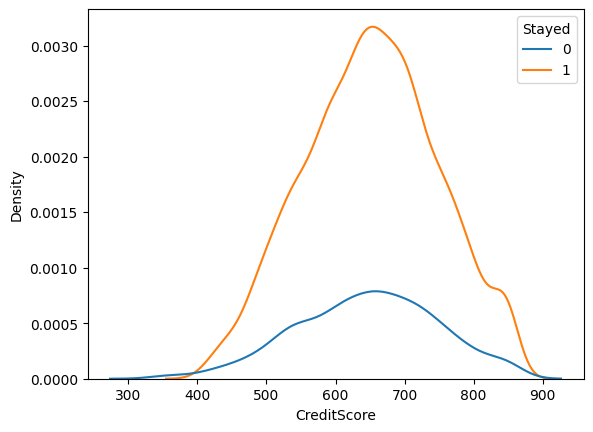

In [1121]:
sb.kdeplot(data=data, x='CreditScore', hue='Stayed')
plt.show()

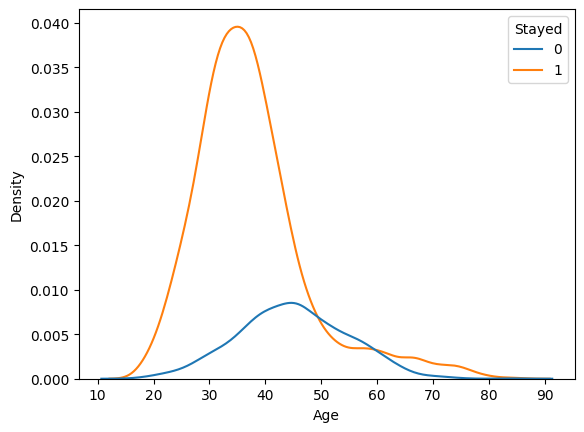

In [1122]:
sb.kdeplot(data=data, x='Age', hue='Stayed')
plt.show()

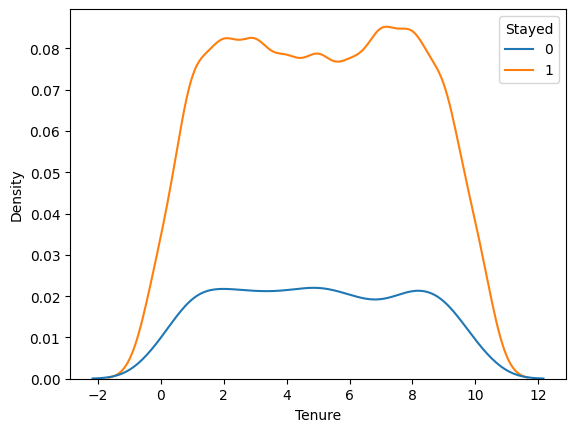

In [1123]:
sb.kdeplot(data=data, x='Tenure', hue='Stayed')
plt.show()

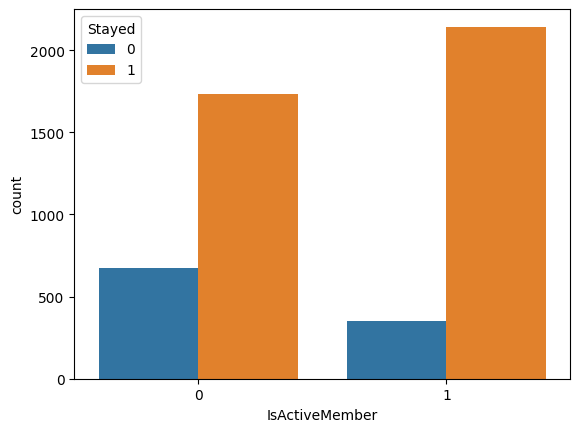

In [1124]:
sb.countplot(data=data, x='IsActiveMember', hue='Stayed')
plt.show()

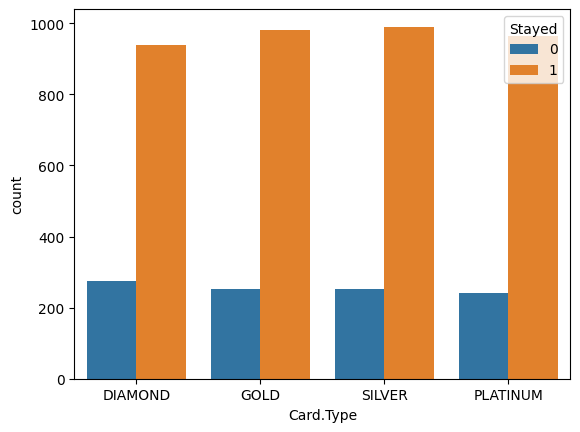

In [1125]:
sb.countplot(data=data, x='Card.Type', hue='Stayed')
plt.show()

In [1126]:
data = data[['Age', 'IsActiveMember', 'Gender', 'Geography', 'NumOfProducts', 'Stayed']]

In [1127]:
data.head()

,Age,IsActiveMember,Gender,Geography,NumOfProducts,Stayed
0,37.0,1,Female,France,1,0
1,41.0,1,Female,Spain,1,1
2,42.0,0,Female,France,3,0
3,39.0,0,Female,France,2,1
4,43.0,1,Female,Spain,1,1


In [ ]:
dummies = pd.get_dummies(data['Geography'], prefix='Geography_', dtype=int)
data = pd.concat([data, dummies], axis=1) # !!!!!
data.drop(columns='Geography', inplace=True)

In [1129]:
dummies = pd.get_dummies(data['Gender'], prefix='Gender_', dtype=int)
data = pd.concat([data, dummies], axis=1)
data.drop(columns='Gender', inplace=True)

In [1130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4897 entries, 0 to 4897
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4897 non-null   float64
 1   IsActiveMember      4897 non-null   int64  
 2   NumOfProducts       4897 non-null   int64  
 3   Stayed              4897 non-null   int32  
 4   Geography__France   4897 non-null   int32  
 5   Geography__Germany  4897 non-null   int32  
 6   Geography__Spain    4897 non-null   int32  
 7   Gender__Female      4897 non-null   int32  
 8   Gender__Male        4897 non-null   int32  
dtypes: float64(1), int32(6), int64(2)
memory usage: 267.8 KB


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data.drop(columns='Stayed')
y_train = train_data['Stayed']
X_test = test_data.drop(columns='Stayed')
y_test = test_data['Stayed']

# !
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {'ccp_alpha': np.arange(0.0, 0.001, 0.0001)}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    cv=cv,
    param_grid=param_grid
)

grid.fit(X_train, y_train)
best_ccp = grid.best_params_['ccp_alpha']
print(best_ccp)

0.0006000000000000001


In [1132]:
model = DecisionTreeClassifier(ccp_alpha=best_ccp)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

result = pd.DataFrame({
    'Real': y_test,
    'Predicted': y_predicted
})

print(result)

      Real  Predicted
144      1          1
79       1          1
4631     1          1
1860     1          1
4881     1          1
...    ...        ...
168      1          1
3660     1          1
1666     1          1
2776     0          0
4715     1          1

[980 rows x 2 columns]


In [1133]:
TP = np.sum((result['Real'] == 1) & (result['Predicted'] == 1))
TN = np.sum((result['Real'] == 0) & (result['Predicted'] == 0))
FP = np.sum((result['Real'] == 0) & (result['Predicted'] == 1))
FN = np.sum((result['Real'] == 1) & (result['Predicted'] == 0))

conf_matrix = pd.DataFrame({
    'Pred 0': [TN, FN],
    'Pred 1': [FP, TP]
}, index=['Actual 0', 'Actual 1'])

print(conf_matrix)

          Pred 0  Pred 1
Actual 0      92     119
Actual 1      19     750


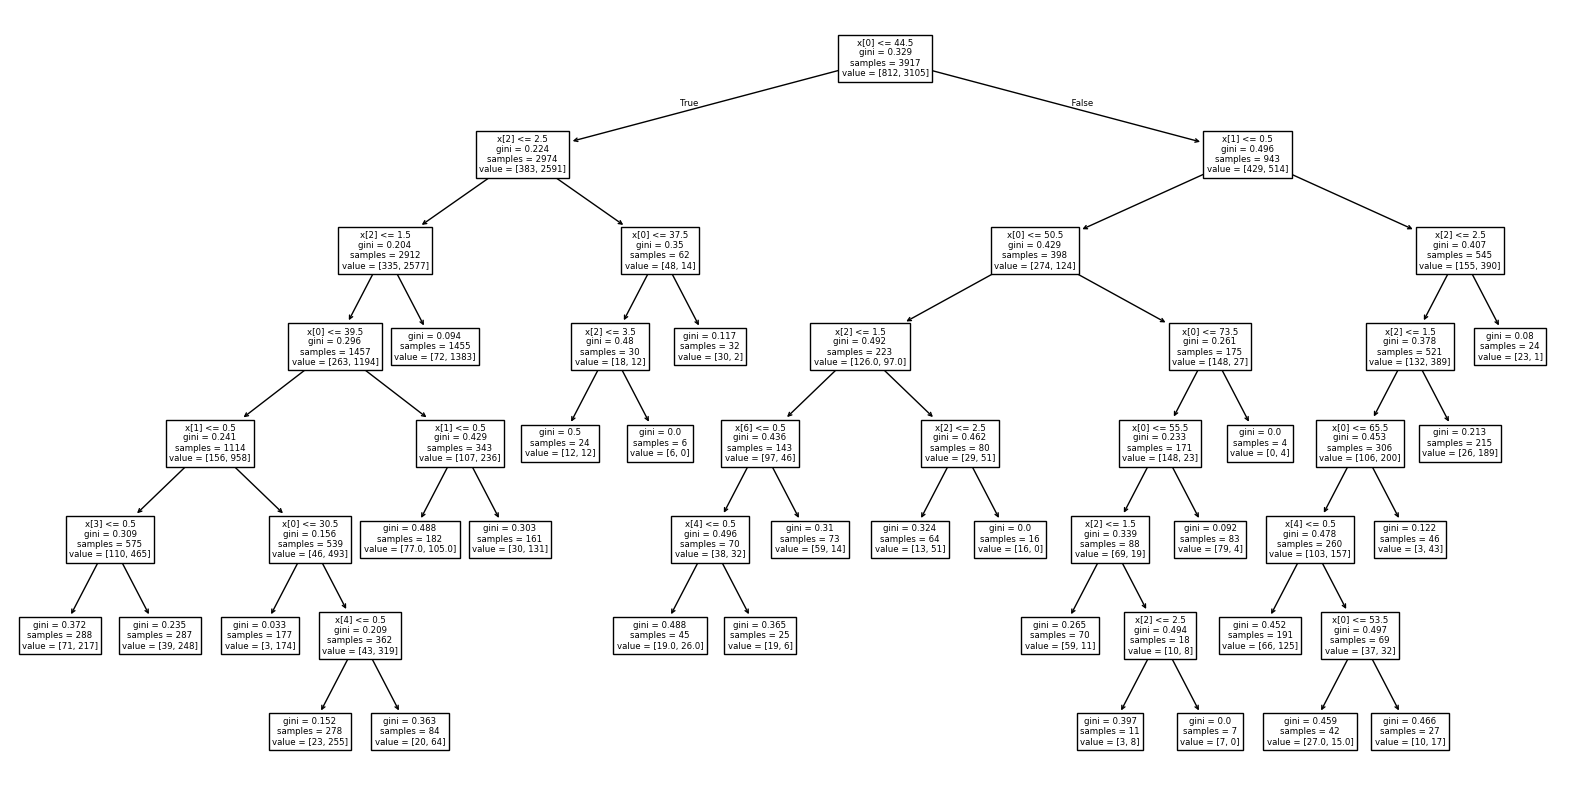

In [1134]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    
)
plt.show()

In [ ]:
# !
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * precision * recall / (precision + recall)

print(accuracy)
print(precision)
print(recall)
print(F1)

0.8591836734693877
0.8630609896432682
0.9752925877763329
0.9157509157509157
